# Plan:
1. Decide the backtesting library - backtrader
2. Decide the data vendor - yfinance
  
# Steps for the Algorithm:

## Installation:
1. Install the backtesting library
2. Install the data provider API
  
## Import the necessary libraries:
1. Download the data
data=yf.download('^NSEI')
2. Define the strategy rules
Class NewStrategy

## Instantiate the backtesting Engine
import backtrader as bt

Cerebro = bt.Cerebro()

## Add data and strategy to the bt engine
cerebro.adddata(data)

cerebro.addstrategy(NewStrategy)

cerebro.broker.setcash()

cerebro.broker.setcommission(commission=0.001)

## Run the backtest and plot the strategy
cerebro.run()

cerebro.plot()

## References:
https://www.backtrader.com/docu/

https://blog.quantinsti.com/backtrader/

## Installation:
1. Install the backtesting library
2. Install the data provider API



In [1]:
'''
#!pip install matplotlib==3.2.2
#!pip Install backtrader
#!pip install yfinance
'''

'\n#!pip install matplotlib==3.2.2\n#!pip Install backtrader\n#!pip install yfinance\n'

## Import the necessary libraries:

In [2]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import numpy as np


/Users/sunilguglani/opt/anaconda3/envs/environment1/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## ***Define Trading Strategy*** 

### ***Hypothesis: If the close price of NIFTY goes above its 200DMA then it represents uptrend and vice versa. And its momentum is highest for the next 3 candles***
****************************
### ***Enter Long/Buy: If the close price of NIFTY goes above its 200DMA***
### ***Exit Long/Buy: After 3 candles of Entry***
****************************
### ***Enter Short/Sell: If the close price of NIFTY goes below its 200DMA***
### ***Exit Short/Sell: After 3 candles of Entry***
****************************
### ***(Period: 1-Jan-2010 to 10-Jun-2022, Interval: 1 day, Script: NIFTY)***

In [3]:



class Mystrategy(bt.Strategy):
	# when initializing the instance, create a 100-day MA indicator using the closing price
	def __init__(self):
		self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=200)
		self.order = None
 
	def next(self):
		if self.order:
			return
		if not self.position: # check if you already have a position in the market
			if (self.data.close[0] > self.ma[0]) & (self.data.close[-1] < self.ma[-1]):
				self.log('Buy Create, %.2f' % self.data.close[0])
				self.order = self.buy(size=10) # buy when closing price today crosses above MA.
			if (self.data.close[0] < self.ma[0]) & (self.data.close[-1] > self.ma[-1]):
				self.log('Sell Create, %.2f' % self.data.close[0])
				self.order = self.sell(size=10)  # sell when closing price today below MA
		else:
		# This means you are in a position, and hence you need to define exit strategy here.
			if len(self) >= (self.bar_executed + 3):
				self.log('Position Closed, %.2f' % self.data.close[0])
				self.order = self.close()
 
	# outputting information
	def log(self, txt):
		dt=self.datas[0].datetime.date(0)
		print('%s, %s' % (dt.isoformat(), txt))
   
	def notify_order(self, order):
		if order.status == order.Completed:
			if order.isbuy():
				self.log(
				"Executed BUY (Price: %.2f, Value: %.2f, Commission %.2f)" %
				(order.executed.price, order.executed.value, order.executed.comm))
			else:
				self.log(
				"Executed SELL (Price: %.2f, Value: %.2f, Commission %.2f)" %
				(order.executed.price, order.executed.value, order.executed.comm))
			self.bar_executed = len(self)
		elif order.status in [order.Canceled, order.Margin, order.Rejected]:
			self.log("Order was canceled/margin/rejected")
		self.order = None


[*********************100%***********************]  1 of 1 completed
2011-03-28, Buy Create, 5687.25
2011-03-29, Executed BUY (Price: 5686.50, Value: 56865.00, Commission 56.87)
2011-04-01, Position Closed, 5826.05
2011-04-04, Executed SELL (Price: 5842.00, Value: 56865.00, Commission 58.42)
2011-05-02, Sell Create, 5701.30
2011-05-03, Executed SELL (Price: 5689.70, Value: -56897.00, Commission 56.90)
2011-05-06, Position Closed, 5551.45
2011-05-09, Executed BUY (Price: 5575.20, Value: -56897.00, Commission 55.75)
2012-02-01, Buy Create, 5235.70
2012-02-02, Executed BUY (Price: 5272.10, Value: 52721.00, Commission 52.72)
2012-02-07, Position Closed, 5335.15
2012-02-08, Executed SELL (Price: 5343.80, Value: 52721.00, Commission 53.44)
2012-05-04, Sell Create, 5086.85
2012-05-07, Executed SELL (Price: 5017.80, Value: -50178.00, Commission 50.18)
2012-05-10, Position Closed, 4965.70
2012-05-11, Executed BUY (Price: 4938.85, Value: -50178.00, Commission 49.39)
2012-06-12, Buy Create, 5115.

2020-02-26, Sell Create, 11678.50
2020-02-27, Executed SELL (Price: 11661.25, Value: -116612.50, Commission 116.61)
2020-03-03, Position Closed, 11303.30
2020-03-04, Executed BUY (Price: 11351.35, Value: -116612.50, Commission 113.51)
2020-07-17, Buy Create, 10901.70
2020-07-20, Executed BUY (Price: 10999.45, Value: 109994.50, Commission 109.99)
2020-07-23, Position Closed, 11215.45
2020-07-24, Executed SELL (Price: 11149.95, Value: 109994.50, Commission 111.50)


<IPython.core.display.Javascript object>


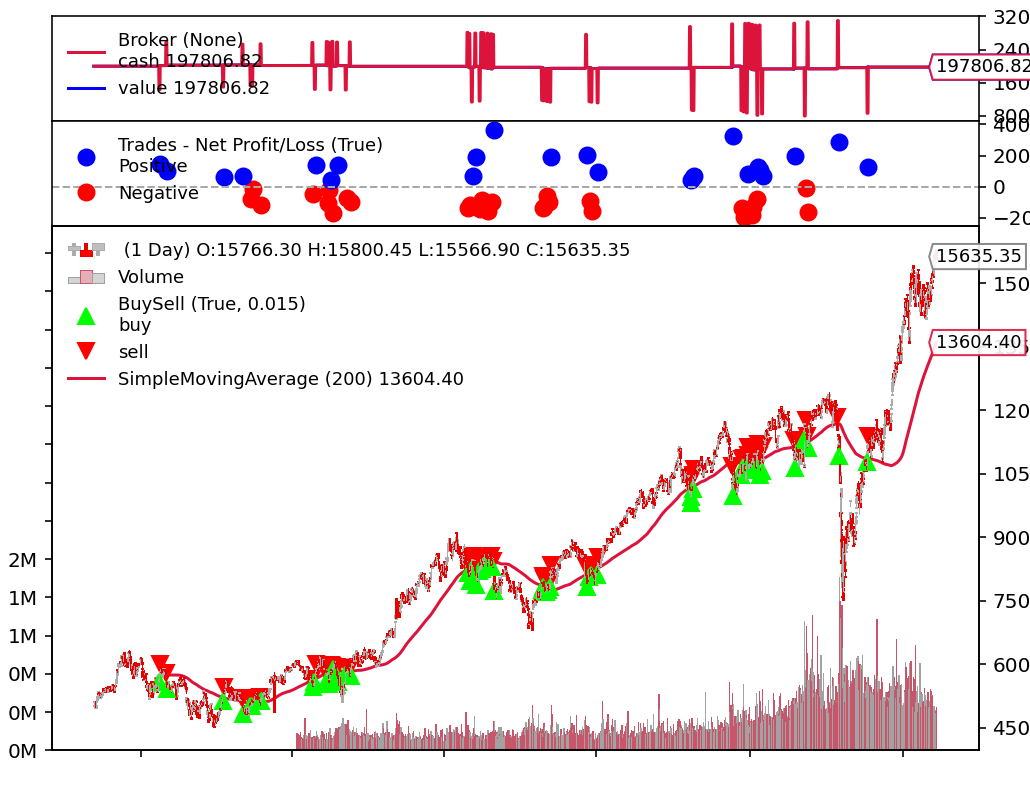

In [4]:

if __name__ == '__main__':
	cerebro = bt.Cerebro() 
	data = bt.feeds.PandasData(dataname=yf.download("^NSEI", "2010-6-1", "2021-6-10"))
	cerebro.adddata(data)
   
	cerebro.addstrategy(Mystrategy)
	cerebro.broker.setcash(200000)
	cerebro.broker.setcommission(commission=0.001)
	
	cerebro.run()
	%matplotlib inline
	# Plot the strategy
	cerebro.plot(style='candlestick',loc='grey', grid=False) 

